# Homework 3: Build a CNN for Image Recognition

### Name: Ravi Patel | CWID: 10432313 | Date: 3/26/2019

## 1. Data Prep

#### Load Data

In [1]:
from keras.datasets import cifar10
import numpy as np

(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

#Examine the data shape
print('Shape of x_train: ' + str(x_train.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_test: ' + str(y_test.shape))


Using TensorFlow backend.


Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


#### Create Method for One_Hot Encoding

In [3]:
def to_one_hot(y, num_class=10):
    """
        transforms an n x 1 array to a n x 10 matrix
    """
    result = np.zeros(shape=(y.shape[0],num_class))
    for i in range(y.shape[0]):
        result[i][y[i]]=1 
    return result


y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

#print(y_train[0])
#print(y_train_vec[0])

In [4]:
# Randomly partition athe training set to training 
# and validation sets

rand_indices = np.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

## 2. Build a CNN and tune its hyper-params

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [6]:
from keras import optimizers

learning_rate = 1E-4

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(lr=learning_rate),
              metrics=['acc']
             )

## 3. Training the model with partial training data

In [7]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=30, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 853s 21ms/step - loss: 2.0603 - acc: 0.2847 - val_loss: 1.6086 - val_acc: 0.4053
Epoch 2/30
40000/40000 [==============================] - 846s 21ms/step - loss: 1.6704 - acc: 0.3961 - val_loss: 1.4508 - val_acc: 0.4681
Epoch 3/30
40000/40000 [==============================] - 829s 21ms/step - loss: 1.4970 - acc: 0.4616 - val_loss: 1.3799 - val_acc: 0.4991
Epoch 4/30
40000/40000 [==============================] - 814s 20ms/step - loss: 1.3995 - acc: 0.4970 - val_loss: 1.3126 - val_acc: 0.5244
Epoch 5/30
40000/40000 [==============================] - 811s 20ms/step - loss: 1.3139 - acc: 0.5286 - val_loss: 1.2236 - val_acc: 0.5597
Epoch 6/30
40000/40000 [==============================] - 812s 20ms/step - loss: 1.2416 - acc: 0.5575 - val_loss: 1.1773 - val_acc: 0.5780
Epoch 7/30
40000/40000 [==============================] - 1184s 30ms/step - loss: 1.1798 - acc: 0.5777 - val_loss: 1

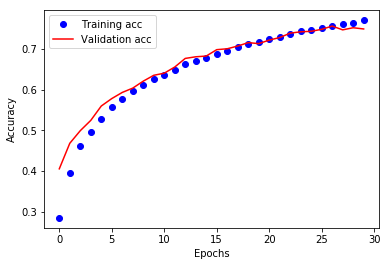

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 4. Training the model with the full training data

In [9]:
history = model.fit(x_train, y_train_vec, batch_size=32, epochs=30)


Epoch 1/30
50000/50000 [==============================] - 1383s 28ms/step - loss: 0.6743 - acc: 0.7612
Epoch 2/30
50000/50000 [==============================] - 1397s 28ms/step - loss: 0.6609 - acc: 0.7700
Epoch 3/30
50000/50000 [==============================] - 1129s 23ms/step - loss: 0.6470 - acc: 0.7734
Epoch 4/30
50000/50000 [==============================] - 989s 20ms/step - loss: 0.6331 - acc: 0.7770
Epoch 5/30
50000/50000 [==============================] - 1006s 20ms/step - loss: 0.6236 - acc: 0.7818
Epoch 6/30
50000/50000 [==============================] - 964s 19ms/step - loss: 0.6144 - acc: 0.7850
Epoch 7/30
50000/50000 [==============================] - 969s 19ms/step - loss: 0.5942 - acc: 0.7909
Epoch 8/30
50000/50000 [==============================] - 1235s 25ms/step - loss: 0.5874 - acc: 0.7923
Epoch 9/30
50000/50000 [==============================] - 3637s 73ms/step - loss: 0.5763 - acc: 0.7981
Epoch 10/30
50000/50000 [==============================] - 1410s 28ms/step -

## 5. Evaluating the model with the test dataset

In [10]:
scores = model.evaluate(x_test, y_test_vec)
print("Loss: "+str(scores[0]))
print("Accuracy: "+str(scores[1]))

10000/10000 [==============================] - 62s 6ms/step
Loss: 0.5656601219415665
Accuracy: 0.8102
